In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [2]:
df_complete= pd.read_csv('dataset.csv',index_col=0)

### HUMAN = 0
 
### AI = 1

In [3]:
# Crear un diccionario de mapeo
mapping = {'Human-Generated-Text': 0, 'AI-Generated-Text': 1}

In [4]:
#Reemplazar las clases en la columna 'class' con el mapeo

df_complete['class'] = df_complete['class'].map(mapping)

In [5]:
df_complete.head()

,text,class
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,1
1,Mount Washington is a peak in the White Mount...,1
2,Acer hillsi is an extinct maple species that w...,1
3,Derrick George Sherwin (16 April 1936 – 17 Oct...,0
4,The Windows shell is the graphical user interf...,0


In [6]:
df_complete['len_text'] = df_complete['text'].str.len()

In [7]:
df_class_human = df_complete[df_complete['class'] == 0]
df_class_ai = df_complete[df_complete['class'] == 1]

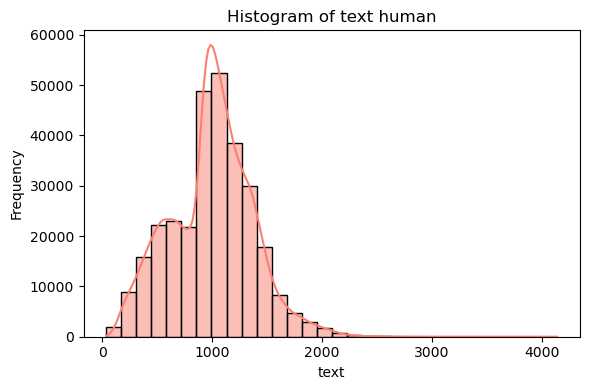

In [88]:
plt.figure(figsize=(6,4))
sns.histplot(df_complete['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of text human')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

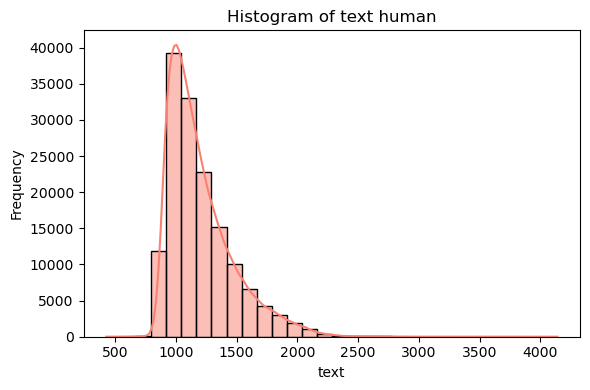

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df_class_human['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of text human')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

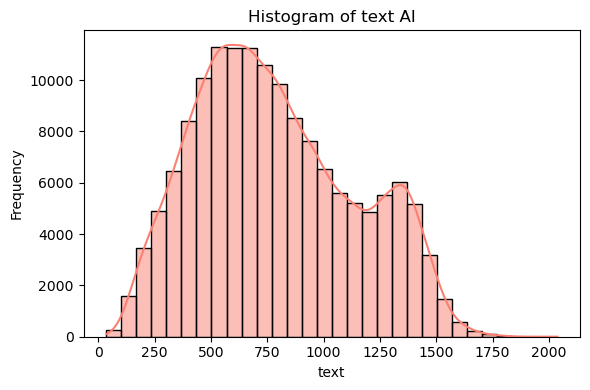

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df_class_ai['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of text AI')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

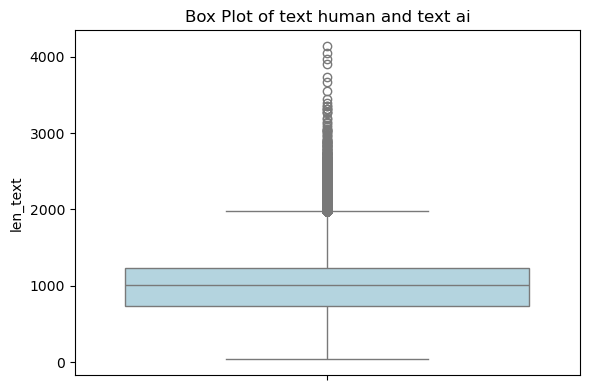

In [12]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_complete['len_text'], color="lightblue") 
plt.title(f'Box Plot of text human and text ai') 
plt.tight_layout()
plt.show()

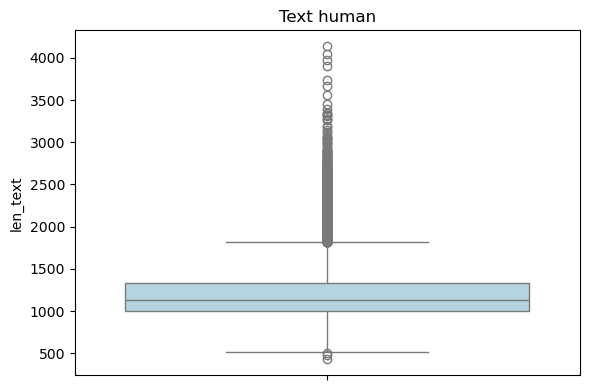

In [13]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_class_human['len_text'], color="lightblue") 
plt.title(f'Text human') 
plt.tight_layout()
plt.show()

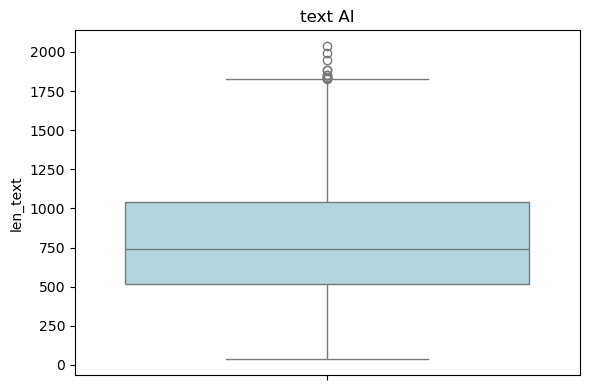

In [14]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_class_ai['len_text'], color="lightblue") 
plt.title(f'text AI') 
plt.tight_layout()
plt.show()

## Aplicacion de iqr para eliminacion de outliers

### Data frame complete

In [ ]:

# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_complete['len_text'].quantile(0.25)
Q3 = df_complete['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_complete_sin_outliers = df_complete[(df_complete['len_text'] >= lower_bound) & (df_complete['len_text'] <= upper_bound)]


### Data frame human

In [ ]:
# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_class_human['len_text'].quantile(0.25)
Q3 = df_class_human['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_human_sin_outliers = df_class_human[(df_class_human['len_text'] >= lower_bound) & (df_class_human['len_text'] <= upper_bound)]

### Data frame AI

In [ ]:
# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_class_ai['len_text'].quantile(0.25)
Q3 = df_class_ai['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_ai_sin_outliers = df_class_ai[(df_class_ai['text_len'] >= lower_bound) & (df_class_ai['text_len'] <= upper_bound)]